In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_data(num_distributions=3, means=None, covariances=None, num_samples=500):
    """
    Generates 2D Gaussian-distributed random variables and returns them with labels.
    
    Parameters:
        num_distributions (int): Number of Gaussian distributions to generate.
        means (list of tuples): List of mean vectors (x, y) for each distribution.
        covariances (list of arrays): List of 2x2 covariance matrices.
        num_samples (int): Number of samples per distribution.
    
    Returns:
        numpy.ndarray: Concatenated array of all samples.
        numpy.ndarray: Array of labels indicating the source distribution.
    """
    
    # Default means and covariances if none provided
    if means is None:
        means = [(i * 5, i * 5) for i in range(num_distributions)]
    if covariances is None:
        covariances = [np.array([[1, 0.5], [0.5, 1]]) for _ in range(num_distributions)]
    
    all_samples = []
    labels = []
    colors = ['r', 'g', 'b', 'c', 'm']  # Extend if needed
    
    plt.figure(figsize=(8, 6))
    
    for i in range(num_distributions):
        samples = np.random.multivariate_normal(mean=means[i], cov=covariances[i], size=num_samples)
        all_samples.append(samples)
        labels.append(np.full(num_samples, i))
        plt.scatter(samples[:, 0], samples[:, 1], s=2, label=f'Distribution {i+1}', color=colors[i % len(colors)])
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Gaussian Distributions')
    plt.legend()
    plt.grid()
    plt.show()
    
    return np.vstack(all_samples), np.concatenate(labels)


def create_binary_labels(data, labels, zero_ratio=0.9):
    """
    Assigns binary labels (0 or 1) to the dataset, ensuring that a specified percentage gets label 0.
    
    Parameters:
        data (numpy.ndarray): Input data samples.
        labels (numpy.ndarray): Original labels.
        zero_ratio (float): Fraction of samples that should be labeled as 0 (default is 90%).
    
    Returns:
        numpy.ndarray: Array of binary labels (0 or 1).
    """
    num_samples = len(data)
    num_zeros = int(num_samples * zero_ratio)
    num_ones = num_samples - num_zeros
    
    binary_labels = np.zeros(num_samples, dtype=int)
    binary_labels[:num_ones] = 1  # Assign 1s to a subset
    
    np.random.shuffle(binary_labels)  # Shuffle to randomize assignment
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=binary_labels, cmap='coolwarm', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Data Colored by Binary Labels')
    plt.colorbar(label='Binary Label (0 or 1)')
    plt.grid()
    plt.show()

    return binary_labels

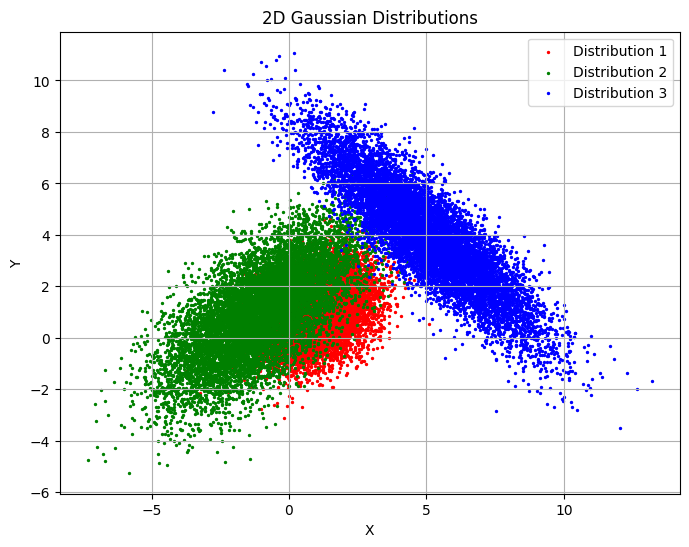

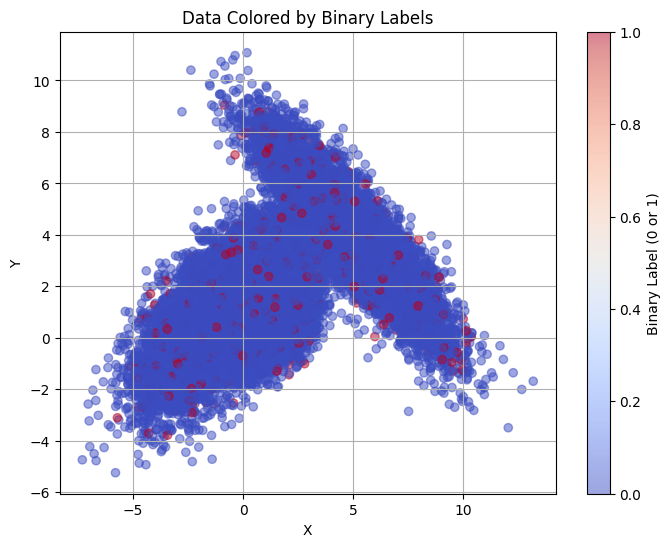

In [7]:
means = [(1,1), (-1, 1), (5,4)]
cov_1 = np.array([[1,0.3], [0.3,1]])
cov_2 = np.array([[3,2],[2,3]])
cov_3 = np.array([[4,-3.5], [-3.5,4]])
covars = [cov_1, cov_2, cov_3]
data, labels = generate_gaussian_data(num_distributions=3, means=means, covariances=covars, num_samples=10000)
binary_labels = create_binary_labels(data, labels, zero_ratio = 0.95)